In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
#Q1. Analyse data structure
# read data from file uploaded on GITHUB
df=pd.read_csv("https://raw.githubusercontent.com/prashant-devops/AI-Algorithm/main/winequality-red.csv")

In [3]:
#Q1 Use head
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Q1 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#Q1 Describe
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Print the correlation matrix between quality and the other attributes.
corr_matrix = df.corr()
print("Correlation matrix:\n", corr_matrix["quality"].sort_values(ascending=False))

Correlation matrix:
 quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [8]:
#Find the value_counts of the quality attribute.

value_counts = df["quality"].value_counts()
print("Value counts of the 'quality' attribute:\n", value_counts)

Value counts of the 'quality' attribute:
 5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [9]:
# Split the data into 80% training set and 20% testing set, and print the shape of X_train, y_train, X_test, and y_test.

from sklearn.model_selection import train_test_split

X = df.drop("quality", axis=1)
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1279, 11)
Shape of y_train: (1279,)
Shape of X_test: (320, 11)
Shape of y_test: (320,)


In [10]:
# Train a svm model (we will call it model1) to predict the quality of wine on the training set using: kernel = rbf, gamma = 1, and C =1.

from sklearn.svm import SVC

model_1 = SVC(kernel='rbf', gamma=1, C=1)
model_1.fit(X_train, y_train)
print("Accuracy: ",model_1.score(X_test,y_test))

Accuracy:  0.51875


In [11]:
# Test your model on the test set, and report the classification_report on the y_test and y_predict

from sklearn.metrics import classification_report

y_predict = model_1.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_predict))

Classification report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.49      0.87      0.63       130
           6       0.53      0.31      0.39       132
           7       1.00      0.29      0.44        42
           8       0.00      0.00      0.00         5

    accuracy                           0.52       320
   macro avg       0.34      0.24      0.24       320
weighted avg       0.55      0.52      0.47       320



/Users/prashant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prashant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prashant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


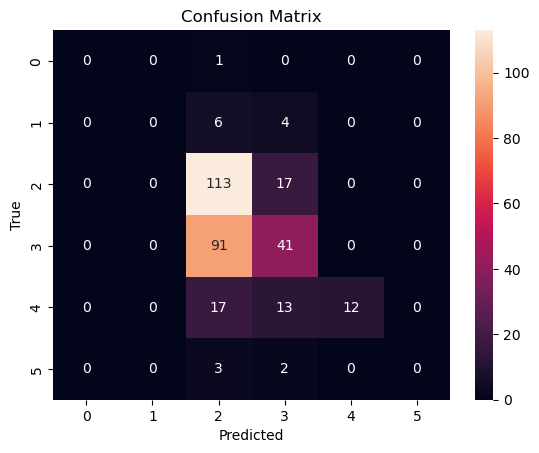

In [12]:
# Plot the confusion matrix of your test results using ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mat = confusion_matrix(y_test, y_predict)
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Train a svm model with the same kernel and gamma values but with a smaller value of C (e.g., C=0.01), and only report the classification_report. We
#will refer to this model as model2.

model2 = SVC(kernel='rbf', gamma=1, C=0.01)
model2.fit(X_train, y_train)

y_predict = model2.predict(X_test)
print("Classification report for Model 2:\n", classification_report(y_test, y_predict))

Classification report for Model 2:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.41      1.00      0.58       130
           6       0.00      0.00      0.00       132
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00         5

    accuracy                           0.41       320
   macro avg       0.07      0.17      0.10       320
weighted avg       0.17      0.41      0.23       320



/Users/prashant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prashant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prashant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Train a svm model with the same kernel and gamma values but with a larger
# value of C (e.g., C=10), and only report the classification_report. We will refer to this model as model3

model3 = SVC(kernel='rbf', gamma=1, C=10)
model3.fit(X_train, y_train)

y_predict = model3.predict(X_test)
print("Classification report for Model 3:\n", classification_report(y_test, y_predict))


Classification report for Model 3:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.50      0.85      0.63       130
           6       0.55      0.36      0.43       132
           7       1.00      0.31      0.47        42
           8       0.00      0.00      0.00         5

    accuracy                           0.53       320
   macro avg       0.34      0.25      0.26       320
weighted avg       0.56      0.53      0.50       320



/Users/prashant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prashant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prashant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Evaluate model1 using cross validation with cv=5. Report on the cross_val_score, and the mean of the accuracy scores.

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_1, X_train, y_train, cv=5)
print("Cross validation scores:", scores)
print("Mean accuracy:", np.mean(scores))


Cross validation scores: [0.56640625 0.56640625 0.5703125  0.58203125 0.57647059]
Mean accuracy: 0.5723253676470588
